<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/66DaysOfData/blob/main/DataCleaningKaggleMiniCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handling Missing Values

In [ ]:
#Initial setup
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving NFL Play by Play 2009-2017 (v4).csv to NFL Play by Play 2009-2017 (v4).csv


In [ ]:
#Read in data
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

#set seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's take a look at some of the data; this should always be the first thing you do when loading in a new dataset.

In [ ]:
#look at first five rows of data
#There is a handful of missing data we can see already 
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Let's check how many missing data points there are

In [ ]:
#get number of missing data per column
missing_values_count = nfl_data.isnull().sum()

# Look at number of missing points in first ten columns
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

There is a lot there. Let's look at the percentage of values that are missing data to understand the scale

In [ ]:
#how many total missing values?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

#percent of data missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.87214126835169


Now we need to understand why the data is missing. For this we have to look closer at the data we are working with. An important question to ask: Is the value missing because it wasn't recorded or because it doesn't exist?

If it is the latter, trying to guess what the value COULD have been is pointless because there isn't a value in the first place. In the case of the former, you can use some intuition and statistics to determine what the value COULD have been.

In [ ]:
#look at number of missing points in first ten columns
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

A look through the data documentation is always helpful. For now we will practice some of the options we have with regards to removing NaN values.

In [ ]:
#remove all the rows that contain a missing value
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [ ]:
# This removed all our data! Why? Because we have at least one NaN value in 
# every row of our dataset and dropna defaults to dropping rows. We need
# to specify that we want to drop all columns with NaN values by setting the
# axis=1
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [ ]:
# Let's see how much we lost
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


We can also fill in missing values instead of completely dropping them from the DataFrame.

In [ ]:
#get small subset of NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Using fillna() we can fill in missing values. Let's start by filling the values with 0.

In [ ]:
#replace NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [ ]:
# Replace NA's with the value that comes directly after it in the same column
# Replace all remaining NA's with 0s
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


##Your Turn

In [ ]:
#Initial Setup
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving Building_Permits.csv to Building_Permits.csv


In [ ]:
# Read in data
sf_permits = pd.read_csv("Building_Permits.csv")

#Set seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Use the code cell below to print the first five rows of the sf_permits DataFrame.

In [ ]:
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Does the dataset have any missing values? Once you have an answer, run the code cell below to get credit for your work

What percentage of the values in the dataset are missing? Your answer should be a number between 0 and 100. (If 1/4 of the values in the dataset are missing, the answer is 25.)

In [ ]:
sf_permits.shape

(198900, 43)

In [ ]:
total_cells = np.product(sf_permits.shape)
total_cells

8552700

In [ ]:
sf_permits.shape[0] * sf_permits.shape[1]

8552700

In [ ]:
total_nan = sf_permits.isnull().sum().sum()
total_nan

2245941

In [ ]:
percent_missing = (total_nan / total_cells) * 100
percent_missing

26.26002315058403

Look at the columns "Street Number Suffix" and "Zipcode" from the San Francisco Building Permits dataset. Both of these contain missing values.

Which, if either, are missing because they don't exist?
Which, if either, are missing because they weren't recorded?

In [ ]:
sf_permits["Street Number Suffix"].value_counts(dropna=False)

NaN    196684
A        1501
B         291
V         228
C          56
E          28
F          24
G          12
D          11
K          11
H          11
R          10
L          10
J           9
I           7
P           3
N           2
0           1
½           1
Name: Street Number Suffix, dtype: int64

In [ ]:
sf_permits["Zipcode"].value_counts(dropna=False)

94110.0    17837
94114.0    13404
94117.0    11780
94109.0    11348
94103.0    10986
94115.0    10095
94118.0     9812
94123.0     9515
94122.0     8886
94105.0     8628
94112.0     7897
94121.0     7773
94107.0     7706
94131.0     7664
94133.0     7424
94102.0     7164
94116.0     6421
94111.0     5385
94108.0     5320
94124.0     5265
94127.0     4993
94104.0     4229
94132.0     3507
94134.0     2983
NaN         1716
94158.0     1058
94130.0       81
94129.0       23
Name: Zipcode, dtype: int64

Looking at the information that we have, it is likely that any NaN values that appear in the "Street Number Suffix" column are there because they do not exist, and any NaN values that appear in the "Zipcode" column are there because they were forgotten or not recorded.

If you removed all of the rows of sf_permits with missing values, how many rows are left?

Note: Do not change the value of sf_permits when checking this

In [ ]:
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Removing all rows that have missing values removes all rows that we have, leaving us with an empty Dataset. This is because there is an NaN value in every row of the dataset. Obviously dropping NaN values by row isn't an option.

Now try removing all the columns with empty values.

Create a new DataFrame called sf_permits_with_na_dropped that has all of the columns with empty values removed.
How many columns were removed from the original sf_permits DataFrame? Use this number to set the value of the dropped_columns variable below.

In [ ]:
sf_permits_with_na_dropped = sf_permits.dropna(axis=1)
sf_permits_with_na_dropped.shape

(198900, 12)

In [ ]:
sf_permits.shape

(198900, 43)

In [ ]:
dropped_columns = sf_permits.shape[1] - sf_permits_with_na_dropped.shape[1]
dropped_columns

31

Try replacing all the NaN's in the sf_permits data with the one that comes directly after it and then replacing any remaining NaN's with 0. Set the result to a new DataFrame sf_permits_with_na_imputed.

In [ ]:
sf_permits_with_na_imputed = sf_permits.fillna(method="bfill", axis=0).fillna(0)
sf_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


#Scaling and Normalization

In [ ]:
#Initial Setup
import pandas as pd
import numpy as np

# For Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

Scaling: Changes the range of data

Normalization: Changing the shape of the distribution of data

###Scaling

Data transformed to fit within a specific scale (0-100 or 0-1 for instance). 

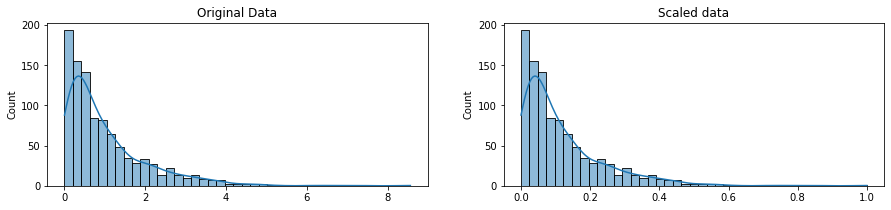

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

The shape of the data doesn't change, simply the range

###Normalization

Normalization changes the observations so they can be described as normal distribution. This is important when using machine learning or statstics that assumes the data is normally distributed. 

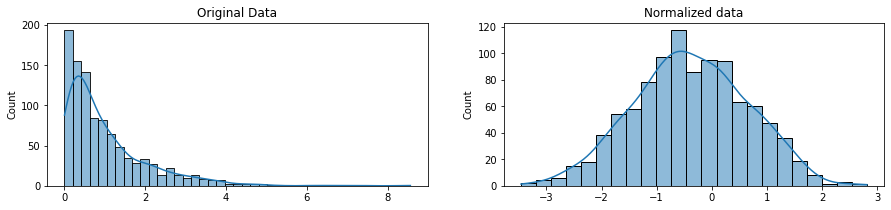

In [ ]:
# Normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

#plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

#Parsing Dates

In [1]:
#Initial Setup
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from google.colab import files
file = files.upload()

Saving catalog.csv to catalog.csv


In [2]:
# read in data
landslides = pd.read_csv("catalog.csv")

# Set seed for reproducibility
np.random.seed(0)

In [3]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
#Print first few rows of date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


We know this column contains dates but Python doesn't know that. The documentation states that there is a dtype specifically for datetime64, and here we can see the the dtyupe is object, which usually tends to mean strings.

In [5]:
#check date type of date column
landslides['date'].dtype

dtype('O')

We need to parse the dates (taking in a string and identifying its component parts)

There are many date formats but the most commong is %d for day, %m for month, %y for two-digit year and %Y for four digit year.

In [7]:
#Create new column, date_parsed, with parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [8]:
#Print first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

After specifying the date format, if you run into errors it is best to let the datetime format be infered automatically. We don't want to always do this, however, because Pandas can sometimes have a hard time guessing the correct format, plus it slows down the run time.

In [9]:
# We can select the day of month
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

It is important to check and make sure the days of the month that were extracted make sense: we wouldn't want the days and months mixed up. We will plot some histograms of the days of the month. We should have values 1 - 31 with fairly even distribution (we have no reason to believe landslides happen more frequently on any certain day of the momnth). The exception will be the 31st because not every month has 31 days.

In [10]:
#remove nas
day_of_month_landslides = day_of_month_landslides.dropna()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


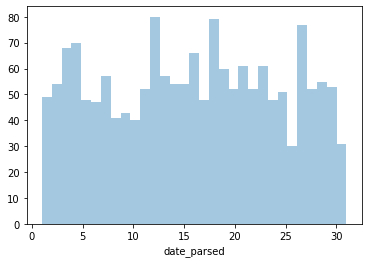

In [11]:
# plot day of month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Everything looks good!

##Your Turn

In [18]:
#Upload files
from google.colab import files
file = files.upload()

Saving database.csv to database.csv


In [100]:
# Initial Setup
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in data
earthquakes = pd.read_csv("database.csv")

# Set seed for reproducibility
np.random.seed(0)

You'll be working with the "Date" column from the earthquakes dataframe. Investigate this column now: does it look like it contains dates? What is the dtype of the column?

In [101]:
earthquakes.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [102]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [103]:
earthquakes["Date"].dtype

dtype('O')

Most of the entries in the "Date" column follow the same format: "month/day/four-digit year". However, the entry at index 3378 follows a completely different pattern. Run the code cell below to see this.

In [104]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [105]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [106]:
# obtain indices of the corresponding values that differ from the format we want
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [107]:
amended_dates = []
years = []
months = []
days = []

for row in earthquakes.Date.loc[indices]:
  years.append(row[:4])
  months.append(row[5:7])
  days.append(row[8:10])

In [108]:
print(years)
print(months)
print(days)

['1975', '1985', '2011']
['02', '04', '03']
['23', '28', '13']


In [109]:
for i in range(len(years)):
  amended_dates.append(months[i] + '/' + days[i] + '/' + years[i])

In [110]:
amended_dates

['02/23/1975', '04/28/1985', '03/13/2011']

In [111]:
earthquakes.Date.loc[indices] = amended_dates

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [112]:
earthquakes.Date.loc[indices]

3378     02/23/1975
7512     04/28/1985
20650    03/13/2011
Name: Date, dtype: object

In [113]:
earthquakes.loc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,02/23/1975,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,04/28/1985,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,03/13/2011,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [114]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23412
Name: Date, dtype: int64

In [116]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [117]:
earthquakes['date_parsed'].head(10)

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
5   1965-01-10
6   1965-01-12
7   1965-01-15
8   1965-01-16
9   1965-01-17
Name: date_parsed, dtype: datetime64[ns]

In [120]:
earthquakes.date_parsed.loc[indices]

3378    1975-02-23
7512    1985-04-28
20650   2011-03-13
Name: date_parsed, dtype: datetime64[ns]

Create a Pandas Series day_of_month_earthquakes containing the day of the month from the "date_parsed" column.

In [122]:
day_of_month_earthquakes = earthquakes["date_parsed"].dt.day

In [123]:
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

Plot the days of the month from your earthquake dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


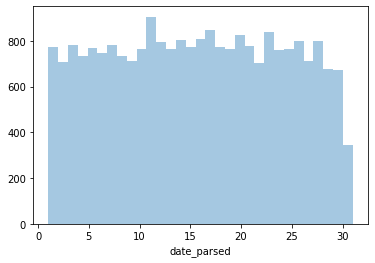

In [124]:
#Remove nans
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

#plot
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

#Character Encodings

In [125]:
#Initial Setup
import pandas as pd
import numpy as np

# Character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

Character encodings are rules for mapping raw binary byte strings to characters. UTF-8 is the main standard text encoding. Ideally all data should be in this encoding. 

In [126]:
# start with a string
before = "This is the euro symbol: €"

# Check datatype
type(before)

str

In [127]:
# encode it to different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

#check type
type(after)

bytes

In [128]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [129]:
#convert back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


In [130]:
#try encoding bytes in ascii
print(after.decode("ascii"))

UnicodeDecodeError: ignored

In [131]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


#Inconsistent Data Entry

In [133]:
from google.colab import files
file = files.upload()

Saving pakistan_intellectual_capital.csv to pakistan_intellectual_capital.csv


In [135]:
!pip install fuzzywuzzy
#Initial Setup
import pandas as pd
import numpy as np

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

#read in data
professors = pd.read_csv("pakistan_intellectual_capital.csv")

np.random.seed(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [136]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [137]:
#get all unique values in 'Country' column
countries = professors['Country'].unique()

#sort alphabetically then look closer
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

We can see that there is a lot of inconsistent data here

In [138]:
# convert to lower case
professors["Country"] = professors['Country'].str.lower()
#remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

In [139]:
#get unique values
countries = professors['Country'].unique()

# sort alphabetically
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

There are some more difficult inconsistencies. Let's use fuzzy matching. This automatically fijnds text strings very similar to target string. This isn't 100% perfect but generally when working with a lot of data it will save you some time.

In [140]:
# Get top 10 closest matches to "south korea"
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

#look
matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

Now let's replace all cities that have a ratio > 47 to "south korea"

In [141]:
#function to replace rows in provided column of dataframe
# that match string above ratio with string
def replace_matches_in_column(df, column, string_to_match, min_ratio=47):
  #get list of unique strings
  strings = df[column].unique()

  #get top 10 closest matches to our input string
  matches = fuzzywuzzy.process.extract(string_to_match, strings, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

  #only get matches with ratio > 90
  close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

  #get rows of all close matches in dataframe
  rows_with_matches = df[column].isin(close_matches)

  #replace all rows of all close matches with input matches
  df.loc[rows_with_matches, column] = string_to_match

  #let us know function is done
  print("All done!")

In [142]:
# use function to replace close matches to "south korea"
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")

All done!


In [143]:
# get unique values in Country column
countries = professors['Country'].unique()

#sort
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

##Your Turn

In [144]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# read in all our data
professors = pd.read_csv("pakistan_intellectual_capital.csv")

# set seed for reproducibility
np.random.seed(0)

In [145]:
# convert to lower case
professors['Country'] = professors['Country'].str.lower()
# remove trailing white spaces
professors['Country'] = professors['Country'].str.strip()

# get the top 10 closest matches to "south korea"
countries = professors['Country'].unique()
matches = fuzzywuzzy.process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")
    
replace_matches_in_column(df=professors, column='Country', string_to_match="south korea")
countries = professors['Country'].unique()

All done!


Write code below to take a look at all the unique values in the "Graduated from" column

In [146]:
professors["Graduated from"].unique()

array(['Asian Institute of Technology',
       'Balochistan University of Information Technology, Engineering and Management Sciences',
       'University of Balochistan',
       "Sardar Bahadur Khan Women's University",
       'SRH Hochschule Heidelberg',
       'Institute of Business Administration,Karachi', 'DUET,Karachi',
       'University of Turbat', 'University of Vienna',
       'Monash University', 'University of Stirling',
       'Chinese Academy of Sciences', 'University of Innsbruck',
       'Vienna University of Technology', 'University of Paris-Est',
       'The University of Cambridge', 'Harbin Institute of Technology',
       'University of Nice, Sophia Antipolis', 'The University of York',
       'Galilée - Université Paris 13', 'University of Bedfordshire',
       'North Dakota State University', 'Kyungpook National University',
       'The University of Manchester',
       'National University of Sciences and Technology',
       'FAST– National University of Computer

Convert every entry in the "Graduated from" column in the professors DataFrame to remove white spaces at the beginning and end of cells.

In [148]:
professors["Graduated from"] = professors['Graduated from'].str.strip()

In the tutorial, we focused on cleaning up inconsistencies in the "Country" column. Run the code cell below to view the list of unique values that we ended with.

In [149]:
# get all the unique values in the 'City' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [150]:
# Get top 10 closest matches to "USA"
matches = fuzzywuzzy.process.extract("usa", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

#look
matches

[('usa', 100),
 ('usofa', 75),
 ('austria', 60),
 ('australia', 50),
 ('spain', 50),
 ('urbana', 44),
 ('uk', 40),
 ('malaysia', 36),
 ('pakistan', 36),
 ('portugal', 36)]

In [151]:
replace_matches_in_column(professors, "Country", "usa", 75)

All done!


In [152]:
# get all the unique values in the 'City' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa'],
      dtype=object)